# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [2]:
colors_df = pd.read_csv('colors.csv')
colors_df

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f
...,...,...,...,...
130,1004,Trans Flame Yellowish Orange,FCB76D,t
131,1005,Trans Fire Yellow,FBE890,t
132,1006,Trans Light Royal Blue,B4D4F7,t
133,1007,Reddish Lilac,8E5597,f


In [ ]:
colors_df.nunique()

id          135
name        135
rgb         124
is_trans      2
dtype: int64

**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [3]:
colors_df.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [4]:
transparent_df = colors_df.pivot(index='id', columns='is_trans', values='rgb')
transparent_df.f.count()

107

In [ ]:
# Or, another easier way than pivoting, similar to the first option = value_counts()
colors_df.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

###Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png">


A lego **set** is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [8]:
sets_df = pd.read_csv('sets.csv')

In [9]:
sets_df

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [10]:
sets_df.sort_values('year').head(n=10)

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9526,700.1.2-1,Single 2 x 2 Brick (ABB),1950,371,1
9546,700.B.1-1,Single 1 x 4 x 2 Window without Glass (ABB),1950,371,1
9523,700.1.1-1,Single 2 x 4 Brick (ABB),1950,371,1
9548,700.B.3-1,Single 1 x 2 x 2 Window without Glass (ABB),1950,371,1
9549,700.B.4-1,Single 1 x 2 x 4 Door without Glass (ABB),1950,371,1


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [11]:
# Call the column in the df, set it equal to the value you want to isolate
# then call THAT inside the df to get all the rows that match that data piece
first_year = sets_df[sets_df['year'] == 1949]
first_year

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [15]:
first_year['num_parts'].sum()

498

**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [17]:
sets_df.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [18]:
# .count() works well here since we are trying to get the NUMBER of sets made. For other aggregate data, we need the .agg() used later on below
sets_by_year = sets_df.groupby('year').count()
sets_by_year['set_num']

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, Length: 71, dtype: int64

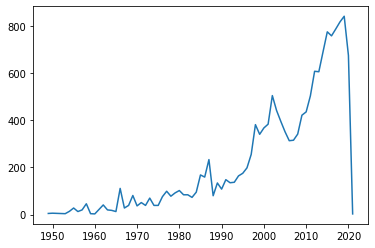

In [ ]:
plt.plot(sets_by_year.index, sets_by_year['set_num'])

**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

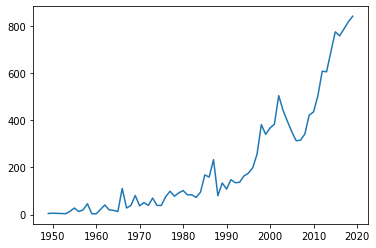

In [ ]:
# Table had 71 rows of data. Slice on both x and y if doing it at a later stage (just once if crafting variable set)
# Note can use 71-2= 69 or just -2
sets_by_year['set_num'][:69]
plt.plot(sets_by_year.index[:69], sets_by_year['set_num'][:-2])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [ ]:
# So we groupby, then agg. agg() takes a dictioniary, using the column name and then the Series (since is a column) nunique
themes_by_year = sets_df.groupby('year').agg({'theme_id':pd.Series.nunique})
themes_by_year

,theme_id
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


In [ ]:
# Since we have to use the column names in the original df to aggregate, we can use this to change the name for our new column
# Note it does not affect the original df, just the newly created aggregated column we made
themes_by_year.rename(columns = {'theme_id': 'nr_themes'}, inplace=True)
themes_by_year

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

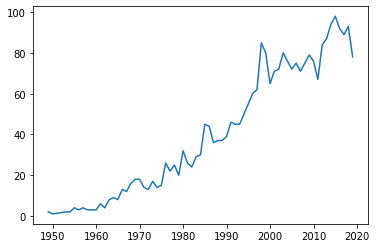

In [ ]:
plt.plot(themes_by_year[:-2])

### Line Charts with Two Seperate Axes

Text(0, 0.5, 'Number of Themes')

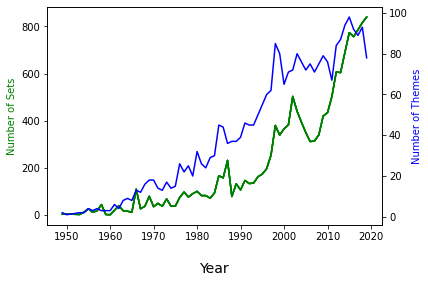

In [ ]:
# To graph two lines with very different scales, we can use separate axis
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() 

# Instead of using plt, we call the axis object directly
ax1.plot(sets_by_year[:-2], label=sets_by_year["set_num"].name, color="g")
ax2.plot(themes_by_year[:-2], label=themes_by_year["nr_themes"].name, color="b")

ax1.set_xlabel('\nYear', fontsize=14)
ax1.set_ylabel('Number of Sets', color='green')
ax2.set_ylabel('Number of Themes', color='blue')

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [ ]:
parts_per_year = sets_df.groupby('year').agg({'num_parts': pd.Series.mean})[:-2]
parts_per_year

,num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143
...,...
2015,191.379845
2016,209.920740
2017,221.840967


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

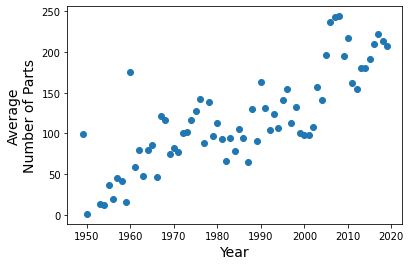

In [ ]:
# Note data only goes til 2019 since parts_per_year was sliced above to exclude 2020 adnd 2021
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average\nNumber of Parts', fontsize=14)
plt.scatter(parts_per_year.index, parts_per_year['num_parts'])


### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [19]:
# note that value_counts() automatically displays sorted descending order
sets_df.theme_id.value_counts()


158    753
501    656
494    398
435    356
503    329
      ... 
307      1
215      1
361      1
210      1
414      1
Name: theme_id, Length: 571, dtype: int64

<img src="https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [20]:
themes_df = pd.read_csv('themes.csv')

In [22]:
themes_df

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0
...,...,...,...
591,705,Iron Man,696.0
592,706,Spider-Man,696.0
593,707,X-Men,696.0
594,708,The LEGO Batman Movie,697.0


In [43]:
star_wars = themes_df[themes_df.name == 'Star Wars']
display(star_wars)
star_wars_ids = star_wars.id.values
display(star_wars_ids)

,id,name,parent_id
17,18,Star Wars,1.0
150,158,Star Wars,NaN
174,209,Star Wars,207.0
211,261,Star Wars,258.0


array([ 18, 158, 209, 261])

In [46]:
# Searching within a dataframe for data that meets our search criteria
sets_df[sets_df.theme_id == 158]

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


In [47]:
# Very manual way to do it, lots of extra work done (see below for faster method with .agg())
total_sets = 0
# Loop through each Star Wars id and calculate total number of Star Wars sets
for id_val in star_wars_ids:
  sw_set = sets_df[sets_df.theme_id == id_val]
  display(sw_set)
  display(sw_set.shape)
  total_sets += sw_set.shape[0]
print(f"\nTotal Star Wars Sets: ", total_sets)

,set_num,name,year,theme_id,num_parts
8786,65081-1,R2-D2 / C-3PO Droid Collectors Set,2002,18,1
12051,8000-1,Pit Droid,2000,18,223
12058,8001-1,Battle Droid,2000,18,336
12066,8002-1,Destroyer Droid,2000,18,567
12071,8007-1,C-3PO,2001,18,339
12072,8008-1,Stormtrooper,2001,18,360
12073,8009-1,R2-D2,2002,18,239
12074,8010-1,Darth Vader,2002,18,388
12081,8011-1,Jango Fett,2002,18,425
12083,8012-1,Super Battle Droid,2002,18,378


(11, 5)

,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


(753, 5)

,set_num,name,year,theme_id,num_parts
11013,75023-1,Star Wars Advent Calendar 2013,2013,209,254
11046,75056-1,Star Wars Advent Calendar 2014,2014,209,273
11080,75097-1,Star Wars Advent Calendar 2015,2015,209,291
11131,75146-1,Star Wars Advent Calendar 2016,2016,209,282
11173,75184-1,Star Wars Advent Calendar 2017,2017,209,309
11206,75213-1,Star Wars Advent Calendar 2018,2018,209,307
11245,75245-1,Star Wars Advent Calendar 2019,2019,209,280
11281,75279-1,Star Wars Advent Calendar 2020,2020,209,312
12019,7958-1,Star Wars Advent Calendar 2011,2011,209,267
14352,9509-1,Star Wars Advent Calendar 2012,2012,209,235


(10, 5)

,set_num,name,year,theme_id,num_parts
14630,9748-1,Droid Developer Kit,1999,261,658
14636,9754-1,Dark Side Developers Kit,2000,261,578


(2, 5)


Total Star Wars Sets:  776


In [48]:
sets_by_theme = sets_df.groupby('theme_id').agg({'set_num':pd.Series.count})
sets_by_theme.sort_values('set_num', ascending=False, inplace=True)
sets_by_theme

,set_num
theme_id,
158,753
501,656
494,398
435,356
503,329
...,...
212,1
210,1
200,1


In [63]:
# Better than before, just loop through index list and add each value to total
total_count = 0
for id in star_wars_ids:
  val = sets_by_theme.loc[id].values
  total_count += val[0]
print(f"\nTotal Star Wars Sets: ", total_count)


Total Star Wars Sets:  776


In [74]:
# Even better! Pass through index list into .loc and returns df with just those rows. Use sum() to quickly total
starwars_df = sets_by_theme.loc[star_wars_ids]
total = starwars_df.sum().values[0]
print(f"\nTotal Star Wars Sets: ", total)


Total Star Wars Sets:  776


### Merging (i.e., Combining) DataFrames based on a Key


In [ ]:
# Even though it has the theme_id as the index, this will still work for merging DataFrames since it's the 'id' column we merge on
# We use a dictioinary to create the new DataFrame {'column_name':column_values}
# Note: using the name 'id' since it matches the other table we want to merge with.
set_theme_count_df = pd.DataFrame({'id':sets_by_theme.index, 
                                   'set_count':sets_by_theme.set_num})

In [ ]:
set_theme_count_df

,id,set_count
theme_id,,
1,1,167
2,2,4
3,3,18
4,4,39
5,5,12
...,...,...
705,705,8
706,706,52
707,707,2


In [ ]:
# on= is the column name we need to use to merge the two together
merged1_df = pd.merge(set_theme_count_df, themes_df, on='id')
merged1_df

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0
...,...,...,...,...
566,307,1,Aquazone,NaN
567,215,1,Pirates,207.0
568,361,1,Skull Spiders,324.0
569,210,1,Belville,207.0


In [ ]:
# By using value_counts, we create a set that is a bit cleaner since the index is normal - HER WAY
# EXTRA WAY
theme_counts = sets_df.theme_id.value_counts()
theme_counts


158    753
501    656
494    398
435    356
503    329
      ... 
307      1
215      1
361      1
210      1
414      1
Name: theme_id, Length: 571, dtype: int64

In [ ]:
# We use a dictioinary to create the new DataFrame {'column_name':column_values}
# Note: using the name 'id' since it matches the other table we want to merge with.
set_theme_count_df = pd.DataFrame({'id':theme_counts.index, 
                                   'set_count':theme_counts.values})
set_theme_count_df

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329
...,...,...
566,307,1
567,215,1
568,361,1
569,210,1


In [ ]:
# on= is the column name we need to use to merge the two together
top_ten_merged_df = pd.merge(set_theme_count_df, themes_df, on='id')[:10]
top_ten_merged_df

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0
5,505,328,Basic Set,504.0
6,497,310,Books,NaN
7,632,299,Town,504.0
8,371,273,Supplemental,365.0
9,516,248,Duplo and Explore,507.0


<BarContainer object of 10 artists>

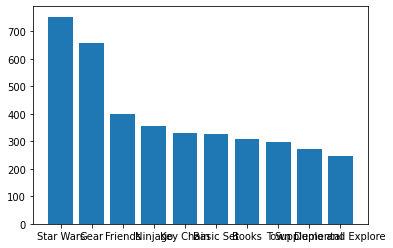

In [ ]:
plt.bar(top_ten_merged_df.name, top_ten_merged_df.set_count)

<BarContainer object of 10 artists>

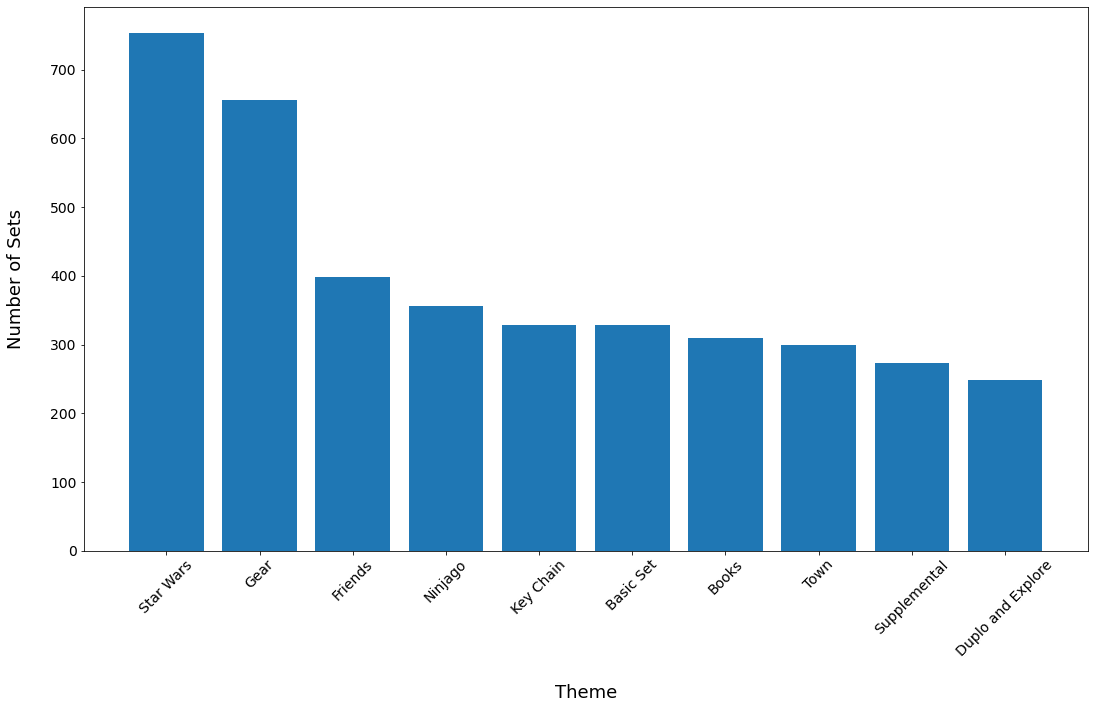

In [ ]:
# Let's configure our bar graph so it's more readable
# Note the rotation for the xticks since they overlap

plt.figure(figsize=(18,10))
plt.xlabel('\nTheme', fontsize=18)
plt.ylabel('Number of Sets\n', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.bar(top_ten_merged_df.name, top_ten_merged_df.set_count)